# Introdução

Nesta analise usaremos um dataset disponibilizado no site do kaggle.

Onde temos um conjunto de dados de previsão de preços de automóveis
A previsão do preço dos automóveis é uma importante área de pesquisa em aprendizado de máquina e finanças.

Fonte do Dataset: https://www.kaggle.com/datasets/bhavikjikadara/car-price-prediction-dataset/data

# Hipoteses:

- [ ] Existe alguma relação em quanto maior o numero de donos do carro menor o preço de venda?

- [ ] Existe alguma relação entre a depreciação e o ano do carro? Forte ou fraca?

## Carregando bibliotecas

In [1]:
import pandas as pd

!pip install openpyxl

!pip install xlrd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 18.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 15.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


# Carregando dataset

In [2]:
pd.read_csv('car_prediction_data.csv')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Definindo dataframe e analisando sua estrutura

In [3]:
df_car = pd.read_csv('car_prediction_data.csv') #Definindo dataframe

In [4]:
df_car.shape #Linhas e colunas

(301, 9)

In [5]:
df_car.columns #Nome das colunas

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Vemos acima que nosso dataset possui 301 linhas e 9 colunas.

Podemos ver os tipos de dado que temos algumas colunas de texto (object), inteiro (int64) e decimal (flo_

# Analisando o dataset

> Calculando a depreciação e adicionando uma nova coluna 'Depreciação' ao Dataframe

In [7]:
df_car['Depreciação'] = (df_car['Selling_Price'] - df_car['Present_Price']) / df_car['Selling_Price']

In [8]:
df_car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciação
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,-0.668657
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,-1.008421
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,-0.358621
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,-0.456140
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,-0.493478
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,-0.221053
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,-0.475000
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,-2.283582
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,-0.086957


> Contando a quantidade de carros por ano.

In [9]:
df_car.Year.value_counts(ascending=False).sort_index()

2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: Year, dtype: int64

Como podemos ver a maioria dos anos dos carros se encontram entre 2010 e 2017

> Calculando a quantidade de carros para vender entre os anos de 2010 e 2017

In [10]:
Qtd_de_carros_2010_2017 = df_car.loc[(df_car['Year'] >= 2010) & (df_car['Year'] <= 2017), 'Year'].count()
print(Qtd_de_carros_2010_2017)

274


91% dos carros a venda estão entre os anos de 2010 e 2017

> Calculando a depreciação MÉDIA: Diminuindo a preço de venda - preço atual / preço de venda

In [11]:
Depreciacao = (df_car['Selling_Price'] - df_car['Present_Price']) / df_car['Selling_Price'] *100
depreciacao_media = Depreciacao.mean()
print(depreciacao_media)

-85.52801376657669


Podemos ver que os proprietários perdem em média 85% do valor na revenda dos carros. Um valor bastante expresivo.

> Contando os tipos de vendedor.

Dealer significa que o carro esta sendo vendido por uma empresa especializada em revenda.

Individual significa que o carro esta sendo vendido pelo proprietário

In [12]:
df_car.groupby('Seller_Type').Car_Name.count().reset_index()\
.sort_values(by='Car_Name', ascending=False)\
.reset_index(drop=True)

,Seller_Type,Car_Name
0,Dealer,195
1,Individual,106


Podemos ver que temos uma maior presença de carros sendo vendidos por empresas empcialziadas. O que pode dos priprietários preferem não vender seus carros pessoalmente.

> Contando os tipos de transmissão

In [13]:
df_car.groupby('Transmission').Car_Name.count().reset_index()\
.sort_values(by='Car_Name', ascending=False)\
.reset_index(drop=True)

,Transmission,Car_Name
0,Manual,261
1,Automatic,40


A maior parte dos carros são do tipo manual

> Armazenando Quantidade carros por tipo de transmissão em variavies

In [22]:
contagem_carros_manual = df_car['Transmission'].value_counts()['Manual']
print(contagem_carros_manual)

261


In [23]:
contagem_carros_manual = df_car['Transmission'].value_counts()['Automatic'] 
print(contagem_carros_manual)

40


> Criando mapa de carrelação para descobrir a relação entre as variaveis. 

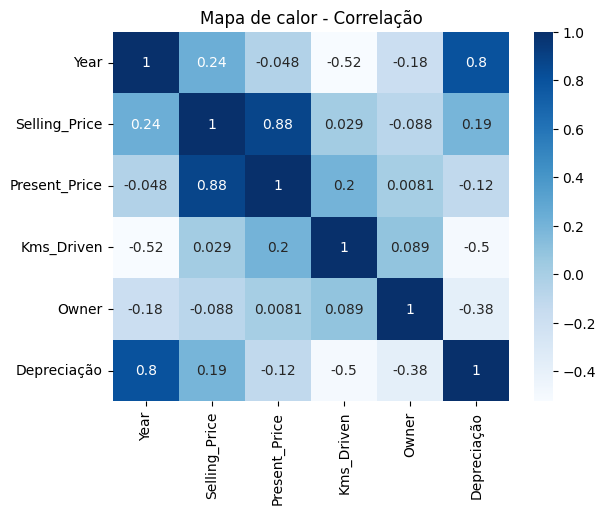

In [15]:
# Criar uma matriz de correlação
matriz_correlacao = df_car.corr()

# Criar um mapa de calor
sns.heatmap(matriz_correlacao, annot=True, cmap='Blues')

# Configurar o título do gráfico
plt.title('Mapa de calor - Correlação')

# Exibir o gráfico
plt.show()

Existe a relação entre o ano do carro e o preço de venda? 

Podemos ver que a despreciação tem uma forte relação com o ano do carro. Ou seja, quanto mais velho for o carro mais dinheiro será perdido na hora da revenda.

Existe alguma relação em quanto maior o numero de donos do carro menor o preço de venda?

Podemos verificar que a quantidade de donos que o carro teve não tem relação forte com o preço de venda. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e58596e1-fa2f-4782-a5a7-1e1b37d9d7f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>